In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Sample Healthcare Data (You can replace this with your actual dataset)
data = {
    'Age': [25, 34, 45, 55, 60, 29, 40, 67, 50, 31],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M'],
    'Blood Pressure': [120, 140, 130, 135, 145, 128, 122, 150, 140, 130],
    'Cholesterol': [190, 220, 240, 200, 250, 210, 230, 260, 180, 215],
    'Heart Disease': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],  # 0: No, 1: Yes
    'BMI': [22.5, 25.0, 30.1, 26.5, 32.2, 23.4, 28.0, 33.0, 24.5, 27.5]
}


In [5]:
# Creating DataFrame
df = pd.DataFrame(data)
print(df)

   Age Gender  Blood Pressure  Cholesterol  Heart Disease   BMI
0   25      M             120          190              0  22.5
1   34      F             140          220              1  25.0
2   45      M             130          240              0  30.1
3   55      F             135          200              0  26.5
4   60      M             145          250              1  32.2
5   29      M             128          210              0  23.4
6   40      F             122          230              0  28.0
7   67      M             150          260              1  33.0
8   50      F             140          180              0  24.5
9   31      M             130          215              0  27.5


In [6]:
# Convert 'Gender' to a categorical type for use only in categorical plots
df['Gender'] = df['Gender'].astype('category')

In [7]:
# Convert 'Heart Disease' to a string to make it usable in color encoding (for hue/color argument)
df['Heart Disease'] = df['Heart Disease'].astype('str')

In [8]:
# Basic Data Overview
print("Dataset Overview:")
print(df.describe())

Dataset Overview:
             Age  Blood Pressure  Cholesterol        BMI
count  10.000000       10.000000    10.000000  10.000000
mean   43.600000      134.000000   219.500000  27.270000
std    14.190764        9.763879    25.868256   3.603717
min    25.000000      120.000000   180.000000  22.500000
25%    31.750000      128.500000   202.500000  24.625000
50%    42.500000      132.500000   217.500000  27.000000
75%    53.750000      140.000000   237.500000  29.575000
max    67.000000      150.000000   260.000000  33.000000


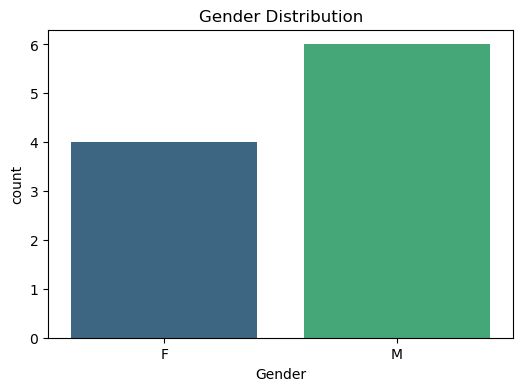

In [9]:
# Gender Distribution (Using categorical variable correctly in countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue= 'Gender', palette='viridis')
plt.title("Gender Distribution")
plt.show()

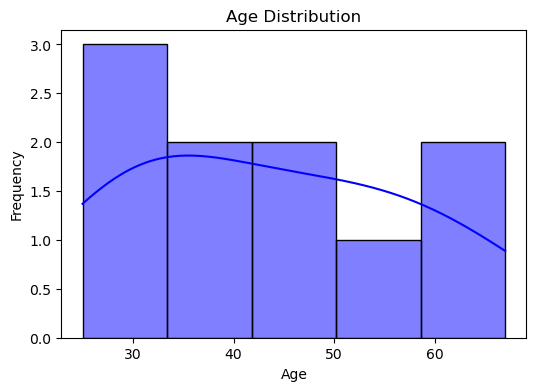

In [10]:
# Age Distribution (Age should be passed as a numeric column to the scatter)
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

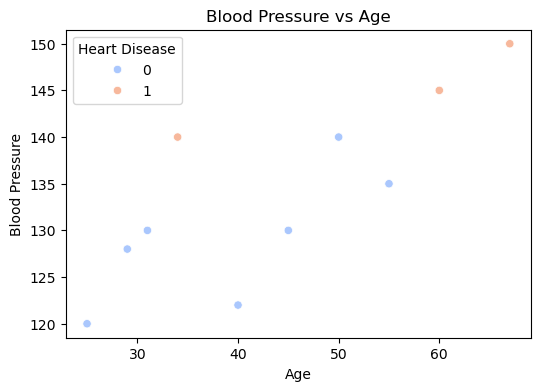

In [11]:
# Blood Pressure vs Age (Correct use of numeric columns for axes)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='Blood Pressure', hue='Heart Disease', palette='coolwarm')
plt.title("Blood Pressure vs Age")
plt.show()

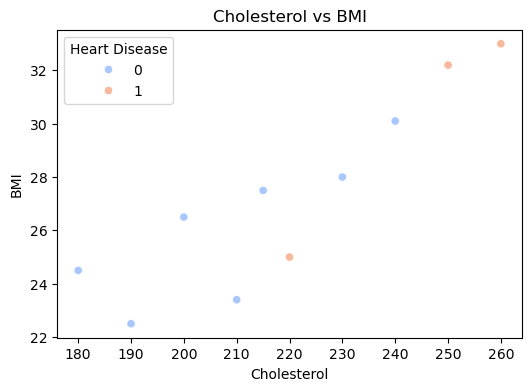

In [12]:
# Cholesterol vs BMI (Correct use of numeric columns for axes)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Cholesterol', y='BMI', hue='Heart Disease', palette='coolwarm')
plt.title("Cholesterol vs BMI")
plt.show()

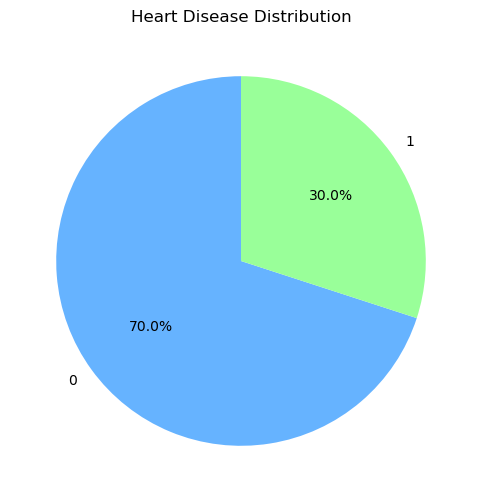

In [13]:
# Heart Disease Prediction (Pie Chart with correct categorical data)
heart_disease_count = df['Heart Disease'].value_counts()
plt.figure(figsize=(6, 6))
heart_disease_count.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)
plt.title("Heart Disease Distribution")
plt.ylabel('')
plt.show()

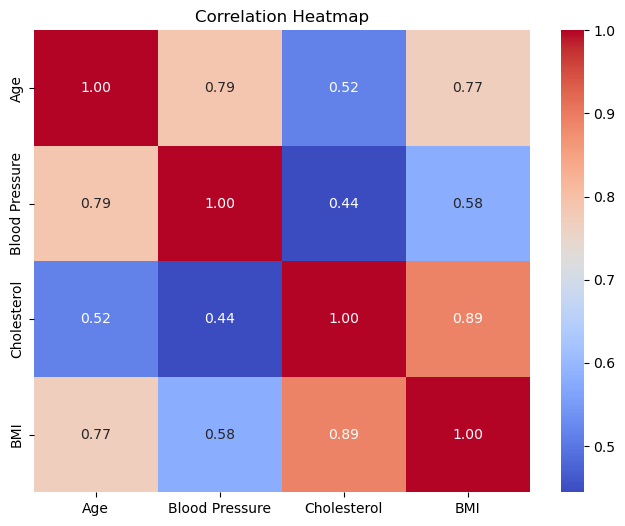

In [17]:
# Correlation Heatmap (Using only numeric columns for correlation analysis)
# Exclude the non-numeric columns (e.g., 'Gender')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
